# Notebook du nettoyage des données

Réalisé par : AMIROUCHE Said 

## 1. l'importation des outils / bibliothéques et de la base de données

In [14]:
import numpy as np , matplotlib as plt 
%pylab inline
from scipy import stats
from scipy.stats import chi2_contingency

import pandas as pd
%matplotlib inline
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [8]:
data_nutri = pd.read_csv('data_nut.csv', sep='\t')

In [9]:
data_nutri.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


## 2. Nettoyage des données

Le nettoyage des données consiste à traiter et interpoler les valeurs NAN, et détérminer les Outliers et les traiter aussi.

###  a) Traitement des valeurs NAN!
J'ai décidé d'enlevé tout les éléments avec plus de 60% de valeur NAN

In [20]:
Moyenne_nulls = data_nutri.isnull().mean(axis=0)
c = []
for i in range(0,len(Moyenne_nulls)):
    if Moyenne_nulls[i] < 0.6:
        templist = list(Moyenne_nulls[Moyenne_nulls==Moyenne_nulls[i]].index)
        for i in range (0,len(templist)):
            c.append(templist[i])
consistants = list(set(c))
data_consist = data_nutri.loc[:,lambda df: consistants]

Ensuite, j'ai enlevé tout les champs que j'en aurai pas besoin pendant l'analyse nutritionnelles

In [21]:
inutile = ["code","url","states_en", "countries_tags","additives","brands",
          "last_modified_datetime","creator","additives_tags",
          "states","states_tags","ingredients_text","created_datetime",
          "serving_size","created_t","nutrition-score-uk_100g","countries",
          "last_modified_t","brands_tags","additives_en",
          "ingredients_that_may_be_from_palm_oil_n"]
for i in range (0,len(inutile)):
    try:
        consistants.remove(inutile[i])
    except ValueError:
        pass
data_consist = data_nutri.loc[:,lambda df: consistants]

Pour le remplissage des données manquantes et aberrantes, j'ai mit "Inconnu" pour les champs qui contient du text, et 0 pour le score nutritionnel parce que on sait pas s'il est bon ou mauvais pour la santé

In [22]:
data_consist["product_name"].fillna("Inconnu",inplace=True)
data_consist["countries_fr"].fillna("Inconnu",inplace=True)
data_consist["nutrition-score-fr_100g"].fillna("0",inplace=True)
data_consist = data_consist.drop('trans-fat_100g',1)
data_consist = data_consist.drop('ingredients_from_palm_oil_n',1)
data_nutri_cons = data_consist.dropna(axis=0,how='any')


visualiser la consistance des données sur un graphe

Text(0,0.5,'Les données')

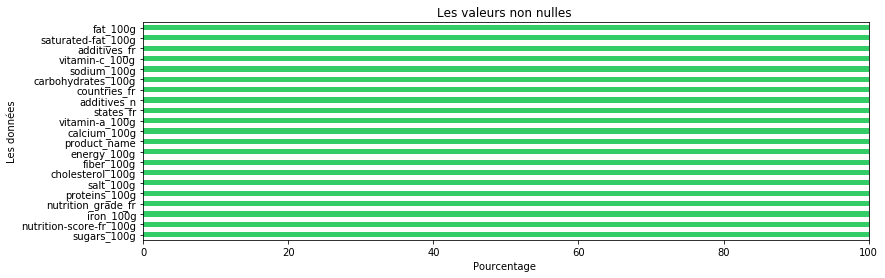

In [23]:
plt.figure(figsize=(13,4))
(data_nutri_cons.notnull().mean(axis=0)*100).plot.barh(color ="#33CC66")
plt.xlim(xmax=100)
plt.title("Les valeurs non nulles ")
plt.xlabel("Pourcentage ")
plt.ylabel("Les données")


Définir une fonction qui permet de visualiser chaque données tout seul à fin de determiner les outliers

In [33]:
def boxplot_univ (feature,plotColor="#CC9900"):
    sns.set_style("whitegrid")
    plt.figure(figsize=(8,3)) 
  
    sns.boxplot(data=data_nutri_cons, y=feature) 

(0, 0.5)

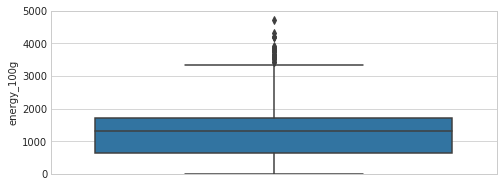

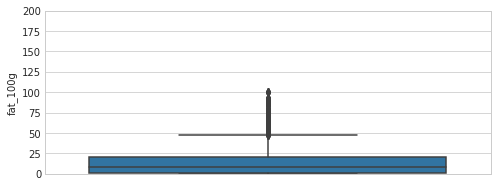

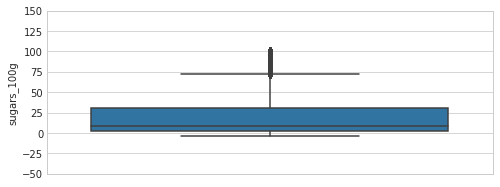

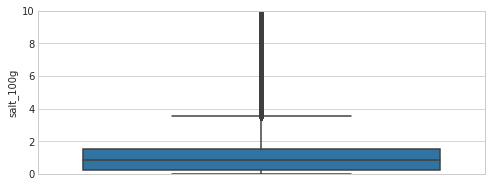

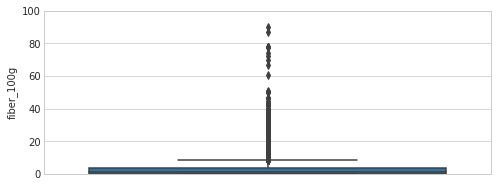

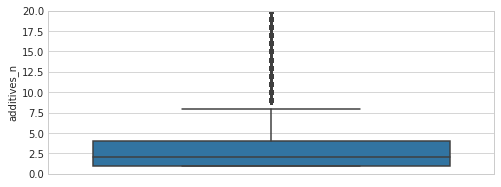

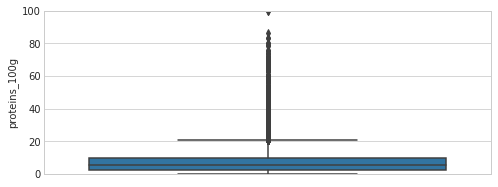

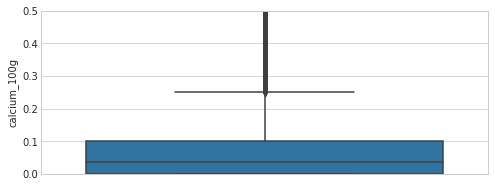

In [34]:
boxplot_univ("energy_100g")
plt.ylim(0, 5000)

boxplot_univ("fat_100g","#FFCC33")
plt.ylim (0, 200)

boxplot_univ("sugars_100g","#33CCFF")
plt.ylim (-50, 150)

boxplot_univ("salt_100g","#F5F5DC")
plt.ylim (0, 10)

boxplot_univ("fiber_100g","#33CC33")
plt.ylim (0, 100)

boxplot_univ("additives_n","purple")
plt.ylim (0, 20)

boxplot_univ("proteins_100g","red")
plt.ylim (0, 100)
boxplot_univ("calcium_100g","#CCCCCC")
plt.ylim (0, 0.5)


### b) Traitement des Outliers

In [10]:
data_nutri_cons.loc[data_nutri_cons.energy_100g > 4000, 'energy_100g'] = 4000
data_nutri_cons.loc[data_nutri_cons.fat_100g > 100, 'fat_100g'] = 100
data_nutri_cons.loc[data_nutri_cons.carbohydrates_100g > 100, 'carbohydrates_100g'] = 100
data_nutri_cons.loc[data_nutri_cons.sugars_100g > 100, 'sugars_100g'] = 100
data_nutri_cons.loc[data_nutri_cons.sugars_100g < 0, 'sugars_100g'] = 0
data_nutri_cons.loc[data_nutri_cons.salt_100g > 100, 'salt_100g'] = 100
data_nutri_cons.loc[data_nutri_cons.sodium_100g > 100, 'sodium_100g'] = 100
data_nutri_cons.loc[data_nutri_cons.fiber_100g >100, 'fiber_100g'] = 100
data_nutri_cons.loc[data_nutri_cons.proteins_100g >100, 'proteins_100g'] = 100
data_nutri_cons.loc[data_nutri_cons.proteins_100g < 0, 'proteins_100g'] = 0

## 3. Exportation de la base de données nettoyée en CSV

In [60]:
data_nutri_cons.to_csv('cleaned.csv', sep='\t')